<a href="https://colab.research.google.com/github/AllenJAG/Proyecto-Final-Simulaci-n-Estocastica-2023/blob/main/codigo_proyecto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tendemos 3 lineas con las que trabajaremos, donde tenemos los siguentes datos

L=[1,2,3]

l_1=[ san pablo, republica,los heroes, universidad de chile, los dominicos]

l_2=[ hospital el pino, san miguel, los heroes, punte cal y canto, cerro blanco, vespucio norte]

l_3=[ Plaza quilicura, Puente cal y canto, plaza de armas, Universidad de chile, Matta, Fernando castillo]

S(L)=[1,...,17]

In [ ]:
#Vectores tiempo entre estaciones

import random

def generar_vector_tiempo_entre_estaciones(longitud):
    # Genera un vector con valores aleatorios entre 30 y 90
    vector = [random.randint(5, 90) for _ in range(longitud)]
    return vector


tiempos_entre_estaciones_1=generar_vector_tiempo_entre_estaciones(4)
tiempos_entre_estaciones_2=generar_vector_tiempo_entre_estaciones(5)
tiempos_entre_estaciones_3=generar_vector_tiempo_entre_estaciones(5)



In [ ]:
#Vectores tiempo en estaciones

def generar_vector_tiempo_en_estaciones(longitud):
    # Genera un vector con valores aleatorios entre 5 y 10
    vector = [random.randint(5, 10) for _ in range(longitud)]
    return vector


tiempos_en_estaciones_1=generar_vector_tiempo_en_estaciones(5)
tiempos_en_estaciones_2=generar_vector_tiempo_en_estaciones(6)
tiempos_en_estaciones_3=generar_vector_tiempo_en_estaciones(6)


In [ ]:
#Vector tiempo partida, estaciones terminales
def generar_vector_partida(terminales) :
    # Genera un vector con valores aleatorios entre 0 y 10
    vector = [random.randint(5, 10) for _ in range(terminales)]
    return vector


tiempos_en_partida_1=generar_vector_partida(2)
tiempos_en_partida_2=generar_vector_partida(2)
tiempos_en_partida_3=generar_vector_partida(2)


In [ ]:
def vector_tiempo(vector_1,vector_2,vector_3):
  # Unir los vectores
  vector_unido = vector_1+vector_2+vector_3
# Calcular el mínimo y máximo
  minimo = min(vector_unido)
  maximo = max(vector_unido)

  return [vector_unido,minimo,maximo]

tR=vector_tiempo(tiempos_entre_estaciones_1,tiempos_entre_estaciones_2,tiempos_entre_estaciones_3)
tDw=vector_tiempo(tiempos_en_estaciones_1,tiempos_en_estaciones_2,tiempos_en_estaciones_3)
t0=vector_tiempo(tiempos_en_partida_1,tiempos_en_partida_2,tiempos_en_partida_3)


In [ ]:
import random

def Vector_Modifying(segment_running_time, t_min, t_max, M):

    p = len(segment_running_time)
    pi = random.randint(1, p)  # Se elige un índice aleatorio en [1, p]
    u = random.uniform(-M, M)  # Se elige un número aleatorio en [-M, M]

    # Se realiza la modificación del elemento en la posición pi
    modified_value = segment_running_time[pi - 1] * u

    # Se verifica si el valor modificado está fuera de los límites
    if modified_value > t_max:
        modified_value = t_max
    elif modified_value < t_min:
        modified_value = t_min

    # Se actualiza el valor en la posición pi
    segment_running_time[pi - 1] = modified_value

    return [segment_running_time,t_min,t_max]



Aca 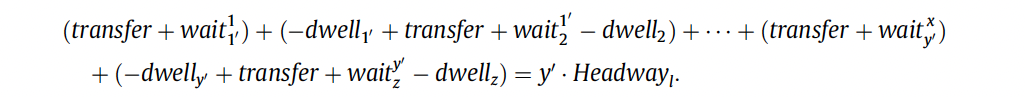

*   t_{max}: corresponde al maximo tiempo entre la
estación s y s-1
*   t_{min}: corresponde al minimo tiempo entre la estación s y s-1

 Este codigo debemos correrlo tres veces, esto se hace para los tiempos entre estaciones del metro, tiempos de permanencia en las estaciones y horarios de salida desde la estacion terminal.

In [ ]:
M= 100

def solution_generator(tR,tDw,t0):

    # Aplica el algoritmo de modificación de vector a los tiempos entre estaciones del metro
    a=Vector_Modifying(tR[0], tR[1], tR[2], M)

    # Aplica el algoritmo de modificación de vector a los tiempos de permanencia en estaciones
    b=Vector_Modifying(tDw[0], tDw[1], tDw[2], M)

    # Aplica el algoritmo de modificación de vector a los horarios de salida desde la estacion terminal
    c=Vector_Modifying(t0[0], t0[1], t0[2], M)
    return a,b,c

In [ ]:
solution_generator(tR,tDw,t0)

([[71, 82, 7, 82, 63, 7, 22, 39, 7, 31, 7, 66, 82, 64], 7, 82],
 [[10, 5, 10, 8, 5, 10, 9, 10, 10, 5, 5, 10, 8, 6, 5, 8, 9], 5, 10],
 [[10, 6, 10, 9, 6, 10], 6, 10])

In [ ]:
import math
import random

# Fijamos los parametros
T0 = 100
s = 0.1
x = 0.98
ML = 50

# Set the initial temperature T
T = T0

def solucion(tR, tDw, t0):
    solution_generator(tR, tDw, t0)
    fs0 = (tR.copy(), tDw.copy(), t0.copy())

    # Calculate the objective function value f(0)
    f_0 = calculate_objective_function(fs0)

    # Display f(0)
    print("f(0) =", f_0)

    # Set the outer iteration n
    n = 0

    # Step 2: For the current T, perform 2.1–2.4
    while T > s:
        # 2.1. Set the inner iteration k
        k = 1

        # 2.2. Let n=n+1. Obtain a new feasible solution fsn
        solution_generator(fs0[0], fs0[1], fs0[2], t_min_value, t_max_value, M_value)
        fsn = (fs0[0].copy(), fs0[1].copy(), fs0[2].copy())

        # Calculate the objective function value f(n)
        f_n = calculate_objective_function(fsn)

        # Calculate Δf = f(n) - f(n-1)
        delta_f = f_n - f_0

        # 2.3. If Δf ≤ 0, fsn replaces fs0, and display f(n)
        if delta_f <= 0:
            fs0 = fsn
            f_0 = f_n
            print("f(", n, ") =", f_n)
        else:
            # If not, let fsn replace fs0 with probability p
            p = math.exp(-delta_f / T)
            if random.uniform(0, 1) < p:
                fs0 = fsn
                f_0 = f_n
                print("f(", n, ") =", f_n)

        # 2.4. If k=ML, go to Step 3; otherwise k =k+1
        if k == ML:
            break
        else:
            k += 1

        # Step 3: Stop or not
        # 3.1. If T ≤ 0.1, stop. Otherwise T = T * x^0.98, and return to Step 2
        if T <= 0.1:
            break
        else:
            T = T * x




In [ ]:
#calculamos la funcion objetivo

def calculate_objective_function(timetable):


In [ ]:

# Parámetros iniciales
initial_temperature = 100
lowest_temperature = 0.1
cooling_coefficient = 0.98
markov_length = 50
t_min = # establece el valor mínimo para los tiempos
t_max = # establece el valor máximo para los tiempos
M = # establece el valor para M

def simulated_annealing(initial_timetable, T0, cooling_coefficient, min_temperature, markov_length, t_min, t_max, M):
    current_timetable = copy.deepcopy(initial_timetable)
    current_objective_function = calculate_objective_function(current_timetable)
    T = T0
    n = 0

    while T > min_temperature:
        k = 1

        while k <= markov_length:
            new_timetable = solution_generator(*current_timetable, t_min, t_max, M)
            new_objective_function = calculate_objective_function(new_timetable)

            delta_f = new_objective_function - current_objective_function

            if delta_f <= 0 or random.random() < math.exp(-delta_f / T):
                current_timetable = copy.deepcopy(new_timetable)
                current_objective_function = new_objective_function
                print(f"Iteration {n}, Inner Iteration {k}, Objective Function: {current_objective_function}")

            k += 1

        T *= cooling_coefficient
        n += 1

    print("Optimal Solution:", current_timetable)
    print("Optimal Objective Function Value:", current_objective_function)



# Input: original first train timetable
initial_timetable = # Implementa la lógica para obtener el horario de tren inicial

# Ejecutar el algoritmo de recocido simulado
simulated_annealing(initial_timetable, initial_temperature, cooling_coefficient, lowest_temperature, markov_length, t_min, t_max, M)


In [ ]:
import random
import math


T0 = 100  # Initial temperature
s = 0.1   # Lowest temperature
x = 0.98  # Cooling coefficient
ML = 50   # Markov length


def calculate_objective_function(solution):
    # Replace this with your actual objective function calculation
    # For demonstration purposes, we'll sum all elements of the solution vector
    return sum(solution[0])

def simulated_annealing(train_timetable):
    T0,
    T = T0
    n = 0

    # Step 1.2
    fs = solution_generator(train_timetable[0], train_timetable[1], train_timetable[2])
    fn = calculate_objective_function(fs)
    print(f"f({n}) =", fn)

    while T > s:
        # Step 2
        k = 1

        while k <= ML:
            # Step 2.2
            n += 1
            fsn = solution_generator(train_timetable[0], train_timetable[1], train_timetable[2])
            fn = calculate_objective_function(fsn)

            # Step 2.3
            delta_f = fn - calculate_objective_function(fs)
            if delta_f <= 0 or random.random() < math.exp(-delta_f / T):
                fs = fsn
                print(f"f({n}) =", fn)

            # Step 2.4
            if k == ML:
                break
            else:
                k += 1

        # Step 3
        T *= x

    print("Optimal solution:", fs)
    print("Optimal objective function value:", calculate_objective_function(fs))


# Example usage
train_timetable = [tR, tDw, t0]  # Replace with your actual train timetable
simulated_annealing(train_timetable)
